# MPRA analysis

In [1]:
setwd("/frazer01/projects/CARDIPS/analysis/cardiac_gwas_coloc")

source("script/functions.R"  )


In [2]:
dir.create("pipeline/mpra"           , showWarnings = FALSE)
dir.create("pipeline/mpra/processing", showWarnings = FALSE)


In [6]:
totest = fread("/frazer01/home/matteo/documents/written/Cardips/cardiac_eqtls/for_validation/with_beta.txt", sep = "\t", header = TRUE, data.table = FALSE)

In [82]:
mpra           = fread("input/mpra/bc-en-rc-dataframe-forMatteo.tsv", sep = "\t", header = TRUE, data.table = FALSE)
colnames(mpra) = c("barcode", "en", "id", "dna1", "rna1", "dna2", "rna2")
mpra$en_id     = unlist(lapply(mpra$id, function(x){unlist(strsplit(x, "-"))[[1]]}))
mpra$allele    = unlist(lapply(mpra$id, function(x){ifelse(grepl("-", x) == TRUE, yes = unlist(strsplit(x, "-"))[[2]], no = "")}))
mpra$exp       = ifelse(grepl("^MA", mpra$en_id) == TRUE, yes = "in", no = "out")

In [83]:
mpra = mpra[ mpra$exp == "in",]

# prepare tests

In [84]:
mpra$dna     = rowSums(mpra[,paste0("dna", 1:2)])
mpra$rna     = rowSums(mpra[,paste0("rna", 1:2)])
mpra$r1      = mpra$rna1 / mpra$dna1
mpra$r2      = mpra$rna2 / mpra$dna2
mpra$r       = mpra$rna  / mpra$dna
mpra$dna_r   = mpra$dna1 / mpra$dna2
mpra$rna_r   = mpra$rna1 / mpra$rna2
mpra$dna_l2r = log2(mpra$dna_r)
mpra$rna_l2r = log2(mpra$rna_r)

mpra$filter_dna = ifelse((mpra$dna_l2r > 0 | mpra$dna_l2r < -2) | mpra$dna1 < 30 | mpra$dna2 < 30, yes = "remove", no = "")
mpra$filter_rna = ifelse((mpra$rna_l2r > 2 | mpra$rna_l2r < -2) | mpra$dna1 < 30 | mpra$dna2 < 30, yes = "remove", no = "")


In [85]:
str(mpra)

'data.frame':	1233 obs. of  21 variables:
 $ barcode   : chr  "GCTGGAGCCGTCTCGACACCGACTT" "GGGGAAACACACAGGAATCCCCGTA" "AGTCAGACCCCGAGTCGCACGAGGT" "AACTCCCGCGATTAAACAGAAAGCA" ...
 $ en        : chr  "TCTTTGCTATTGTGAATAGTGCTGCAATAAACATACGTGTGCATGTGTCTTTATAGCATGTGTTTTTCTTTGTTCTGATTCTGAATTGCCCTGTTGGTGGTGCTGCCCTGT"| __truncated__ "TCTTTGCTATTGTGAATAGTGCTGCAATAAACATACGTGTGCATGTGTCTTTATAGCATGTGTTTTTCTTTGTTCTGATTCTGAATTGCCCTGTTGGTGGTGCTGCCCTGT"| __truncated__ "ATACACCTCAGCATGTGATGTAGATCTGCTCTGCCTCACTCTTCCCACTTTGGGTCCTCATTTAGGTTTAGGGGTAACAAAAGAAGCAAATCTCTCTAGCTTGACATCTTC"| __truncated__ "TGCATGATGTCTGCCATTGTCACTCTAAAACAAGAGGGAAATCTGACATGCTTTTACGTCCTAAAGAAGGAAGATATTCAGTGACTTGTTTAAGTCTCTTCTGAAATAACC"| __truncated__ ...
 $ id        : chr  "MA11-ref" "MA11-ref" "MA26-ref" "MA13-ref" ...
 $ dna1      : int  9691 1208 48097 25475 2319 8912 66608 97 19971 88779 ...
 $ rna1      : int  6798 2103 54357 38973 3400 11297 81903 294 73505 357591 ...
 $ dna2      : int  21701 10028 104561 56267 7232 19724 1

# Initial plots

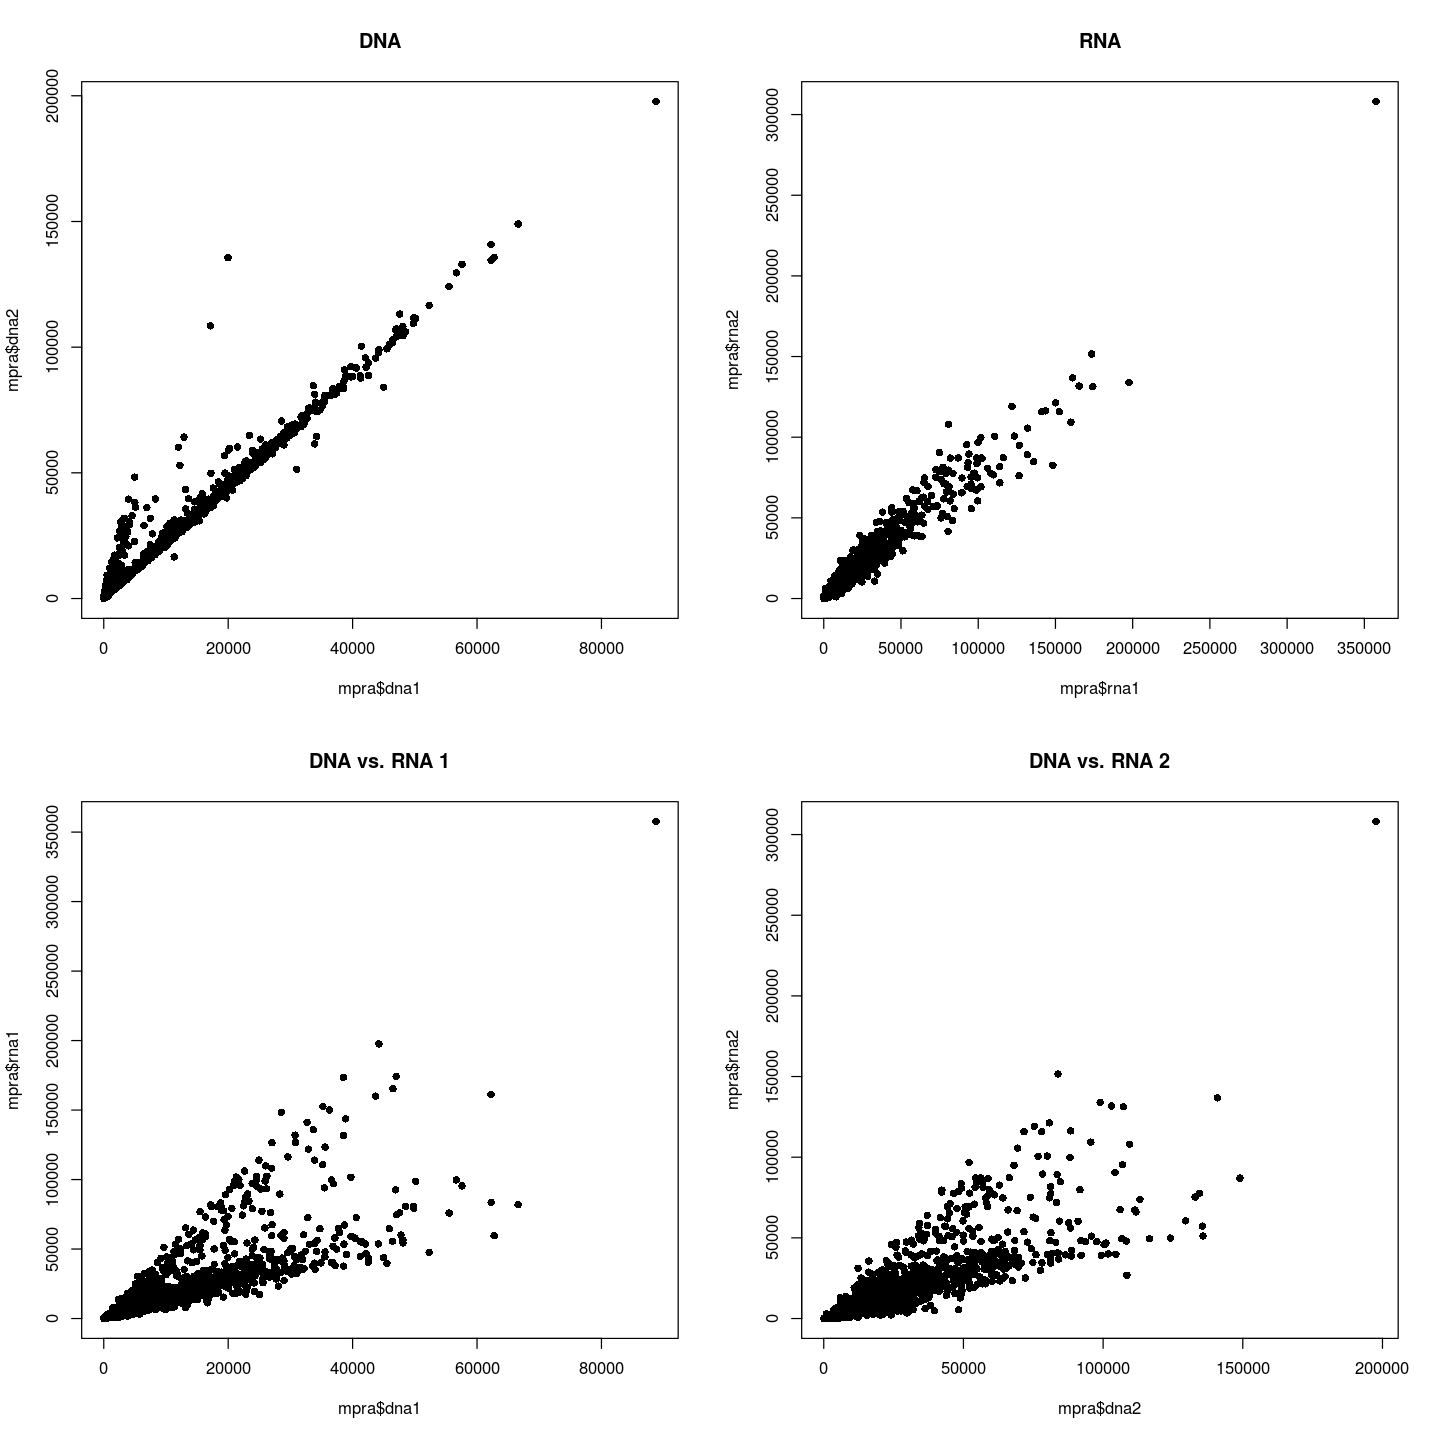


	Pearson's product-moment correlation

data:  mpra[mpra$filter_dna == "" & mpra$filter_rna == "", "r1"] and mpra[mpra$filter_dna == "" & mpra$filter_rna == "", "r2"]
t = 45.431, df = 1005, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7987657 0.8393309
sample estimates:
      cor 
0.8200758 


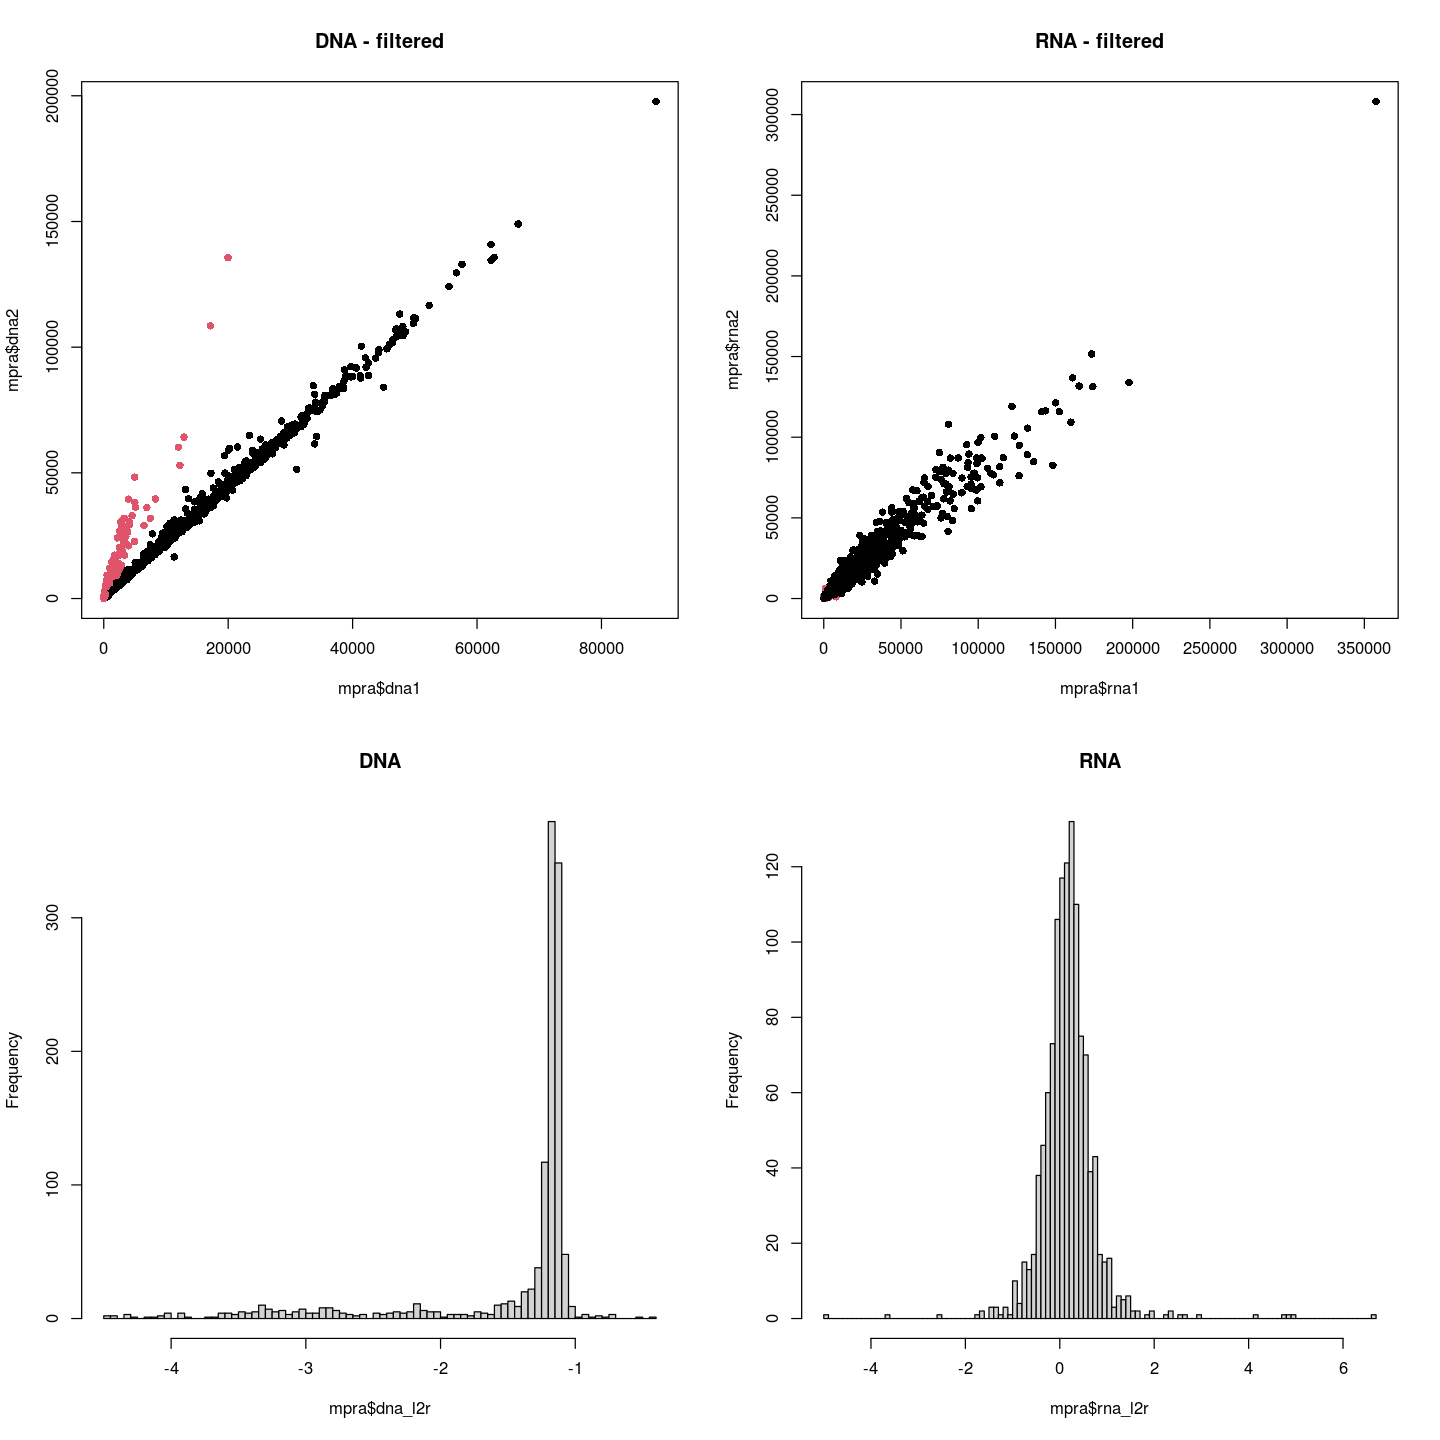

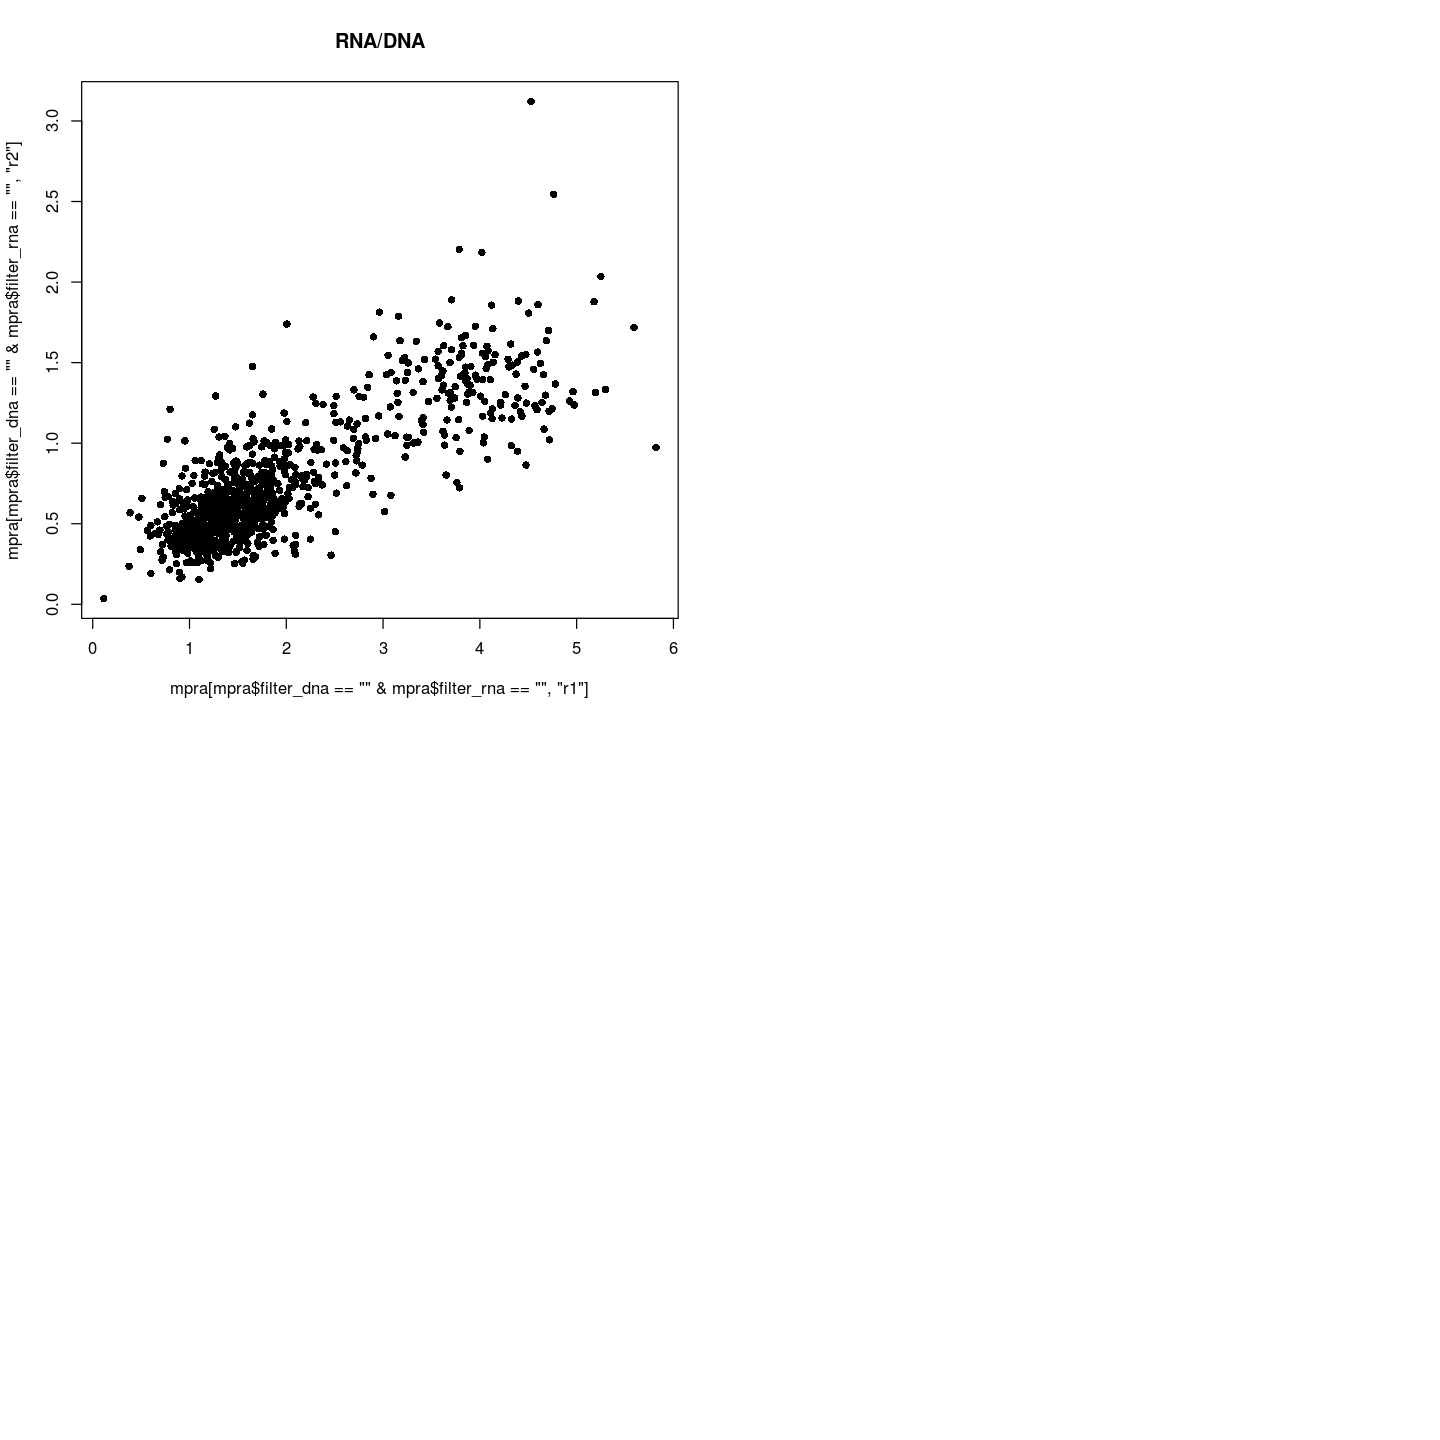

In [92]:
options(repr.plot.width = 12, repr.plot.height = 12)
layout(rbind(1:2, 3:4))

plot(mpra$dna1, mpra$dna2, pch = 16, col = as.factor(mpra$exp), main = "DNA")
plot(mpra$rna1, mpra$rna2, pch = 16, col = as.factor(mpra$exp), main = "RNA")

plot(mpra$dna1, mpra$rna1, pch = 16, col = as.factor(mpra$exp), main = "DNA vs. RNA 1")
plot(mpra$dna2, mpra$rna2, pch = 16, col = as.factor(mpra$exp), main = "DNA vs. RNA 2")

plot(mpra$dna1, mpra$dna2, pch = 16, col = as.factor(mpra$filter_dna), main = "DNA - filtered")
plot(mpra$rna1, mpra$rna2, pch = 16, col = as.factor(mpra$filter_rna), main = "RNA - filtered")

hist(mpra$dna_l2r, breaks = 100, main = "DNA")
hist(mpra$rna_l2r, breaks = 100, main = "RNA")

plot(mpra[ mpra$filter_dna == "" & mpra$filter_rna == "", "r1"], mpra[ mpra$filter_dna == "" & mpra$filter_rna == "", "r2"], pch = 16, main = "RNA/DNA")

cor.test(mpra[ mpra$filter_dna == "" & mpra$filter_rna == "", "r1"], mpra[ mpra$filter_dna == "" & mpra$filter_rna == "", "r2"])


In [88]:
str(mpra)

'data.frame':	1233 obs. of  21 variables:
 $ barcode   : chr  "GCTGGAGCCGTCTCGACACCGACTT" "GGGGAAACACACAGGAATCCCCGTA" "AGTCAGACCCCGAGTCGCACGAGGT" "AACTCCCGCGATTAAACAGAAAGCA" ...
 $ en        : chr  "TCTTTGCTATTGTGAATAGTGCTGCAATAAACATACGTGTGCATGTGTCTTTATAGCATGTGTTTTTCTTTGTTCTGATTCTGAATTGCCCTGTTGGTGGTGCTGCCCTGT"| __truncated__ "TCTTTGCTATTGTGAATAGTGCTGCAATAAACATACGTGTGCATGTGTCTTTATAGCATGTGTTTTTCTTTGTTCTGATTCTGAATTGCCCTGTTGGTGGTGCTGCCCTGT"| __truncated__ "ATACACCTCAGCATGTGATGTAGATCTGCTCTGCCTCACTCTTCCCACTTTGGGTCCTCATTTAGGTTTAGGGGTAACAAAAGAAGCAAATCTCTCTAGCTTGACATCTTC"| __truncated__ "TGCATGATGTCTGCCATTGTCACTCTAAAACAAGAGGGAAATCTGACATGCTTTTACGTCCTAAAGAAGGAAGATATTCAGTGACTTGTTTAAGTCTCTTCTGAAATAACC"| __truncated__ ...
 $ id        : chr  "MA11-ref" "MA11-ref" "MA26-ref" "MA13-ref" ...
 $ dna1      : int  9691 1208 48097 25475 2319 8912 66608 97 19971 88779 ...
 $ rna1      : int  6798 2103 54357 38973 3400 11297 81903 294 73505 357591 ...
 $ dna2      : int  21701 10028 104561 56267 7232 19724 1

# Tests

In [89]:
suppressPackageStartupMessages(library(sjstats))

In [127]:
test_by_id = function(id, x, mpra, totest, remove_filtered = TRUE)
{
    mpra = mpra[ mpra$en_id == id, ]
    
    if(remove_filtered == TRUE){mpra = mpra[ mpra$filter_dna == "" & mpra$filter_rna == "", ]}
    
    mpra$en   = NULL
    replicate = paste0("r", x)
    
    if(x == 0)
    {
        mpra = data.frame(allele = c(mpra$allele, mpra$allele), r0 = c(mpra[, "r1"], mpra[, "r2"]))
    }
    
    mpra = mpra[ is.infinite(mpra[, replicate]) == FALSE,]
    #test = t.test(mpra[ mpra$allele == "alt", replicate], mpra[ mpra$allele == "ref", replicate])
    test = wilcox.test(mpra[ mpra$allele == "alt", replicate], mpra[ mpra$allele == "ref", replicate])
    #out  = data.frame(en_id = id, replicate = x, remove_filtered = remove_filtered, estimate1 = test$estimate[[1]], estimate2 = test$estimate[[2]], pval = test$p.value)
    out  = data.frame(en_id           = id, 
                      replicate       = x, 
                      remove_filtered = remove_filtered, 
                      estimate1       = mean(mpra[ mpra$allele == "alt", replicate], na.rm = TRUE), 
                      estimate2       = mean(mpra[ mpra$allele == "ref", replicate], na.rm = TRUE), 
                      pval            = test$p.value)
    
    return(out)
}

id  = "MA18"
x   = 0
remove_filtered   = FALSE

str(test_by_id(id, x, mpra, totest, remove_filtered))


ids = sort(unique(mpra$en_id))

tests = as.data.frame(rbindlist(lapply(ids, function(id)
{
    as.data.frame(rbindlist(lapply(c("", 0:2), function(x)
    {
        as.data.frame(rbindlist(lapply(c(TRUE, FALSE), function(remove_filtered)
        {
            #message(paste(id, x, remove_filtered), appendLF = FALSE)
            suppressWarnings(test_by_id(id, x, mpra, totest, remove_filtered))
        })), stringsAsFactors = FALSE)
    })), stringsAsFactors = FALSE)
})), stringsAsFactors = FALSE)

#str(test_by_id(id, "", mpra, totest, TRUE))
#test_by_id(id, 0 , mpra, totest, TRUE)
#test_by_id(id, 1 , mpra, totest, TRUE)
#test_by_id(id, 2 , mpra, totest, TRUE)
#

'data.frame':	1 obs. of  6 variables:
 $ en_id          : chr "MA18"
 $ replicate      : num 0
 $ remove_filtered: logi FALSE
 $ estimate1      : num 1.01
 $ estimate2      : num 1.24
 $ pval           : num 0.666


In [128]:
tests[ order(tests$pval),]

,en_id,replicate,remove_filtered,estimate1,estimate2,pval
,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>
97,MA22,,TRUE,0.5999858,0.7169158,0.007507067
70,MA19,1,FALSE,2.0013677,1.7513460,0.012661882
101,MA22,1,TRUE,1.0098915,1.2576299,0.012838875
105,MA23,,TRUE,0.8725938,0.7922315,0.014872378
23,MA11,2,TRUE,0.5624383,0.5020006,0.018632910
66,MA19,,FALSE,1.1582457,1.0061659,0.027565334
102,MA22,1,FALSE,0.9535117,1.2602534,0.028432576
69,MA19,1,TRUE,1.9749555,1.7939813,0.030057205
154,MA3,,FALSE,0.5564221,0.7386958,0.038692160


In [7]:
setdiff(totest$en_id, mpra$id)

[1] "MA1"  "MA2"  "MA3"  "MA5"  "MA6"  "MA8"  "MA9"  "MA10" "MA11" "MA13"
[11] "MA14" "MA15" "MA16" "MA18" "MA19" "MA20" "MA21" "MA22" "MA23" "MA24"
[21] "MA25" "MA26" "MA27" "MA28" "MA30" "MA34" "MA35" "MA36"

In [11]:
str(mpra)

'data.frame':	2417 obs. of  8 variables:
 $ barcode: chr  "GCTGGAGCCGTCTCGACACCGACTT" "GGGGAAACACACAGGAATCCCCGTA" "GCAGGCCAGCAACACATCGGTACAG" "AGTCAGACCCCGAGTCGCACGAGGT" ...
 $ en     : chr  "TCTTTGCTATTGTGAATAGTGCTGCAATAAACATACGTGTGCATGTGTCTTTATAGCATGTGTTTTTCTTTGTTCTGATTCTGAATTGCCCTGTTGGTGGTGCTGCCCTGT"| __truncated__ "TCTTTGCTATTGTGAATAGTGCTGCAATAAACATACGTGTGCATGTGTCTTTATAGCATGTGTTTTTCTTTGTTCTGATTCTGAATTGCCCTGTTGGTGGTGCTGCCCTGT"| __truncated__ "ACTCTCTCAATGTATGCTCAGCCACCAGCTACCACAAGTCACTTAAGTAAACACAGAGGCACCTTGGTGAAAGCAATTGCATGGTCTGAATACCATCAACTGACACTTGTA"| __truncated__ "ATACACCTCAGCATGTGATGTAGATCTGCTCTGCCTCACTCTTCCCACTTTGGGTCCTCATTTAGGTTTAGGGGTAACAAAAGAAGCAAATCTCTCTAGCTTGACATCTTC"| __truncated__ ...
 $ id     : chr  "MA11-ref" "MA11-ref" "EC22-alt" "MA26-ref" ...
 $ dna1   : int  9691 1208 59435 48097 25475 2319 36714 12787 8912 143 ...
 $ rna1   : int  6798 2103 65433 54357 38973 3400 77879 28585 11297 45 ...
 $ dna2   : int  21701 10028 134829 104561 56267 7232 81547 30013 19724 11

In [58]:
c(mpra$allele, mpra$allele)

[1] "ref" "ref" "alt" "ref" "ref" "alt" "alt" "alt" "alt" "alt" "ref" "ref"
  [13] "ref" "alt" "alt" "alt" "alt" "alt" "alt" "alt" "alt" "ref" "ref" "alt"
  [25] "ref" "alt" "ref" "ref" "alt" "alt" "ref" "alt" "alt" "ref" "alt" "alt"
  [37] "alt" "ref" "ref" ""    "alt" "alt" "ref" "alt" "ref" "ref" "ref" "alt"
  [49] "ref" "ref" "alt" "ref" "ref" "alt" "ref" "alt" "ref" "ref" "ref" "ref"
  [61] "ref" "ref" "alt" "ref" "ref" "ref" "alt" "ref" "alt" "ref" "ref" "ref"
  [73] "alt" "ref" "alt" "ref" "ref" "ref" "ref" "alt" "alt" "alt" "ref" "alt"
  [85] "ref" ""    "alt" "alt" "alt" "ref" "alt" "alt" "ref" "alt" "alt" "alt"
  [97] "ref" "alt" "ref" "alt" "ref" "ref" "alt" "ref" "ref" "alt" "alt" "ref"
 [109] "ref" "ref" ""    "ref" "ref" "ref" "alt" "ref" "ref" "ref" "ref" "alt"
 [121] "ref" "alt" "alt" "ref" "alt" "alt" "alt" "ref" "alt" "ref" "ref" "alt"
 [133] "ref" "alt" "ref" "ref" "alt" "ref" "alt" "alt" "ref" "alt" "ref" "ref"
 [145] "ref" "alt" "ref" "alt" "ref" "alt" "ref" "ref" "ref" "ref" "alt" "ref"
 [157] "ref" "ref" "alt" "alt" "alt" "alt" "ref" "ref" "alt" "ref" "ref" "ref"
 [169] "ref" "alt" "ref" "ref" "ref" "ref" "alt" "alt" "ref" "alt" "ref" "alt"
 [181] "ref" "alt" "ref" "ref" "alt" "alt" "ref" "alt" "alt" "alt" "ref" "alt"
 [193] "alt" "alt" "ref" "alt" "alt" "ref" "alt" "ref" "ref" "ref" "alt" "ref"
 [205] "alt" "ref" "alt" "alt" "alt" "ref" "ref" "ref" "ref" "alt" "ref" "alt"
 [217] "alt" "alt" "alt" "alt" "ref" "ref" "alt" "alt" ""    "alt" "ref" "ref"
 [229] "ref" "alt" "ref" "ref" "ref" "alt" "ref" "alt" "ref" "alt" "alt" "alt"
 [241] "ref" "ref" "alt" "ref" "alt" "alt" "ref" "ref" "alt" "ref" "alt" "alt"
 [253] "ref" "alt" "alt" "ref" "alt" "ref" "alt" "alt" "ref" ""    "alt" "alt"
 [265] "alt" "ref" "alt" "ref" ""    "ref" "alt" "alt" "alt" "alt" "alt" "ref"
 [277] "ref" "ref" "ref" "ref" "alt" "alt" "alt" "ref" "ref" "ref" "alt" "alt"
 [289] "ref" "ref" "alt" "alt" "ref" "ref" "alt" "ref" "ref" "ref" "ref" "alt"
 [301] "alt" "alt" "ref" "ref" "alt" "alt" "ref" "ref" "ref" "alt" "alt" "ref"
 [313] "alt" "alt" "alt" "alt" "alt" "ref" "ref" "alt" "ref" "ref" "alt" "ref"
 [325] "ref" "alt" "alt" "ref" "ref" "ref" "alt" "ref" "ref" "ref" "alt" "alt"
 [337] "alt" "ref" "alt" "alt" "alt" "ref" "alt" "alt" "ref" "ref" "ref" "alt"
 [349] "alt" "alt" "ref" "ref" "alt" "ref" "alt" "ref" "alt" "alt" "alt" "ref"
 [361] "alt" "ref" ""    "ref" "ref" "ref" "alt" "alt" "alt" "alt" "ref" "alt"
 [373] "alt" "ref" "alt" "ref" "alt" "ref" "ref" "alt" "alt" "ref" "alt" "ref"
 [385] "ref" "ref" "ref" "alt" "ref" "alt" "alt" "alt" "alt" "alt" "ref" "alt"
 [397] "alt" "ref" "ref" "alt" "ref" "alt" "alt" "alt" "ref" "alt" "ref" "ref"
 [409] "ref" "alt" "ref" "ref" "ref" "ref" "ref" "alt" "ref" "ref" "alt" "ref"
 [421] "ref" "alt" "ref" "alt" "alt" "alt" "ref" "alt" "ref" "alt" "ref" "ref"
 [433] "alt" "ref" "ref" "ref" "ref" "alt" "alt" "ref" "alt" "ref" "alt" "alt"
 [445] "alt" "alt" ""    ""    "alt" "ref" "alt" "alt" "alt" "ref" "alt" "ref"
 [457] "ref" "ref" "ref" "ref" "alt" "alt" "alt" "ref" "ref" "alt" "alt" "ref"
 [469] "ref" "ref" "alt" "ref" "alt" "ref" "alt" "ref" "ref" "ref" "ref" "alt"
 [481] "ref" "alt" "ref" "alt" "alt" "alt" "alt" "ref" "ref" "alt" "ref" "ref"
 [493] "ref" "alt" "alt" "ref" "alt" "ref" "alt" "ref" "alt" "ref" "alt" "alt"
 [505] "alt" "alt" "alt" "ref" "alt" "ref" "alt" "ref" "ref" "alt" "alt" "ref"
 [517] "alt" "alt" "ref" "alt" "ref" "ref" "ref" "alt" "alt" "alt" "ref" "ref"
 [529] "alt" "ref" "alt" "alt" "ref" "ref" "ref" "alt" "ref" "ref" "alt" "ref"
 [541] "alt" "alt" "ref" "alt" "alt" "ref" "alt" "alt" "alt" "ref" "ref" "ref"
 [553] "ref" "ref" "alt" ""    "alt" "alt" "alt" "ref" "alt" "alt" "alt" "ref"
 [565] "alt" "alt" "ref" "alt" "alt" "ref" "ref" "alt" "ref" "alt" "alt" "ref"
 [577] "ref" "alt" "ref" "ref" "alt" "ref" "alt" "ref" "ref" "alt" "ref" "alt"
 [589] "ref" "ref" "ref" "alt" "ref" "ref" "ref" "ref" "ref" "alt" "alt" "ref"
 [601] "ref" "ref" "alt" "ref" "alt" "ref" "ref" "ref

In [95]:
weighted_sd(rnorm(n = 100, mean = 3), runif(n = 100))

data(efc)
weighted_sd(efc[, 1:3], runif(n = nrow(efc)))
weighted_se(efc[, 1:3], runif(n = nrow(efc)))

# survey_median ----
# median for variables from weighted survey designs
if (require("survey")) {
  data(nhanes_sample)

  des <- svydesign(
    id = ~SDMVPSU,
    strat = ~SDMVSTRA,
    weights = ~WTINT2YR,
    nest = TRUE,
    data = nhanes_sample
  )

  survey_median(total, des)
  survey_median("total", des)
}

efc$weight <- abs(rnorm(nrow(efc), 1, .3))
weighted_ttest(efc, e17age, weights = weight)
weighted_ttest(efc, e17age, c160age, weights = weight)
weighted_ttest(e17age ~ e16sex + weight, efc)

[1] 0.9892027

c12hour   e15relat     e16sex 
51.0492642  2.0820140  0.4715379

c12hour   e15relat     e16sex 
1.72455057 0.06669357 0.01561935

Loading required package: survey

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘survey’”



One Sample t-test (two.sided)
# t=290.97  df=890  p-value=0.000

  mean of e17age: 79.171 [78.637, 79.705]



Two-Sample t-test (two.sided)

# comparison between e17age and c160age
# t=49.48  df=1476  p-value=0.000

  mean of e17age    : 79.170
  mean of c160age   : 53.421
  difference of mean: 25.749 [24.728  26.770]



Two-Sample t-test (two.sided)

# comparison of e17age by e16sex
# t=-8.54  df=611  p-value=0.000

  mean in group [1] male  : 76.022
  mean in group [2] female: 80.700
  difference of mean      : -4.679 [-5.755  -3.603]


In [96]:
str(efc)

'data.frame':	908 obs. of  27 variables:
 $ c12hour : num  16 148 70 168 168 16 161 110 28 40 ...
  ..- attr(*, "label")= chr "average number of hours of care per week"
 $ e15relat: num  2 2 1 1 2 2 1 4 2 2 ...
  ..- attr(*, "label")= chr "relationship to elder"
  ..- attr(*, "labels")= Named num [1:8] 1 2 3 4 5 6 7 8
  .. ..- attr(*, "names")= chr [1:8] "spouse/partner" "child" "sibling" "daughter or son -in-law" ...
 $ e16sex  : num  2 2 2 2 2 2 1 2 2 2 ...
  ..- attr(*, "label")= chr "elder's gender"
  ..- attr(*, "labels")= Named num [1:2] 1 2
  .. ..- attr(*, "names")= chr [1:2] "male" "female"
 $ e17age  : num  83 88 82 67 84 85 74 87 79 83 ...
  ..- attr(*, "label")= chr "elder' age"
 $ e42dep  : num  3 3 3 4 4 4 4 4 4 4 ...
  ..- attr(*, "label")= chr "elder's dependency"
  ..- attr(*, "labels")= Named num [1:4] 1 2 3 4
  .. ..- attr(*, "names")= chr [1:4] "independent" "slightly dependent" "moderately dependent" "severely dependent"
 $ c82cop1 : num  3 3 2 4 3 2 4 3 3 3 ...
  